In [2]:
import seaborn as sns
import pandas as pd
import re
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

In [3]:
final_df = pd.read_csv(
    '../../final_df_13/final_df_13.csv').drop(columns='Unnamed: 0')
X_train = pd.read_csv(
    '../../final_df_13/X_train_13.csv').drop(columns='Unnamed: 0')
y_train = pd.read_csv(
    '../../final_df_13/y_train_13.csv').drop(columns='Unnamed: 0')
X_test = pd.read_csv(
    '../../final_df_13/X_test_13.csv').drop(columns='Unnamed: 0')
y_test = pd.read_csv(
    '../../final_df_13/y_test_13.csv').drop(columns='Unnamed: 0')

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 925 non-null    object 
 1   director              925 non-null    object 
 2   distributor           925 non-null    object 
 3   distributor_group     925 non-null    object 
 4   release_date          925 non-null    int64  
 5   release_season        925 non-null    object 
 6   release               925 non-null    object 
 7   form                  925 non-null    object 
 8   nation                925 non-null    object 
 9   screen                925 non-null    int64  
 10  rev_nationwide        925 non-null    float64
 11  aud_nationwide        925 non-null    int64  
 12  rev_seoul             925 non-null    int64  
 13  rev_seoul.1           925 non-null    int64  
 14  genre                 925 non-null    object 
 15  rate                  9

In [26]:
len(X_train), len(X_test), len(y_train), len(y_test),

(740, 185, 740, 185)

In [27]:
df = pd.concat([X_train, y_train], axis=1)

In [28]:
df.head(1)

,title,director,distributor,distributor_group,release_date,release_season,release,form,nation,screen,...,actor_power,director_count,director_movie_count,actor_movie_count,before_news,after_news,holiday,dist_cat,aud_nationwide,log_aud
0,인사이드 아웃,피트 닥터,월트디즈니컴퍼니코리아(주),B,20150709,summer,개봉영화,장편,미국,777,...,0,1,0,0,67.0,352.0,0,B,4968687,15.418666


In [29]:
len(df.columns)

35

In [30]:
df = df.drop(columns=['distributor_group', 'release', 'form',
                      'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'director_count'])

In [31]:
len(df.columns)

28

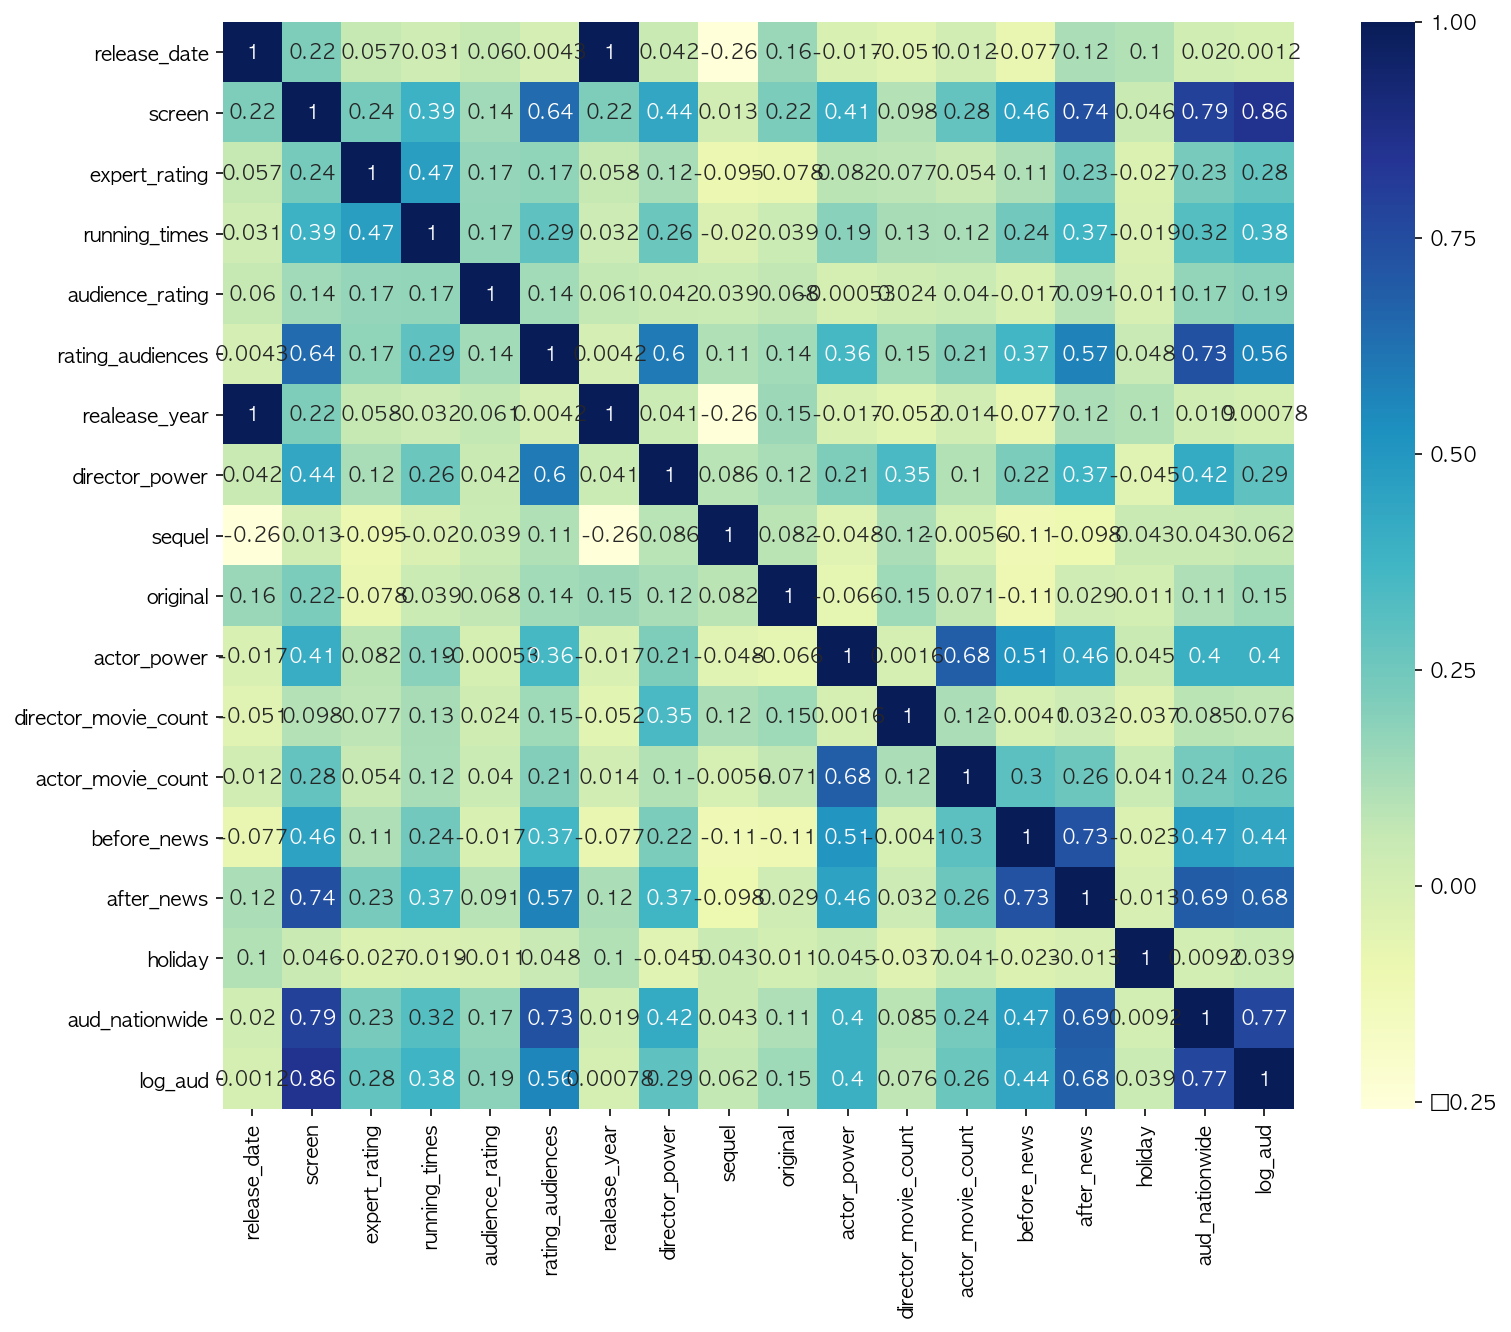

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

plt.show()

In [33]:
df.columns

Index(['title', 'director', 'distributor', 'release_date', 'release_season',
       'nation', 'screen', 'genre', 'rate', 'type', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_movie_count', 'actor_movie_count',
       'before_news', 'after_news', 'holiday', 'dist_cat', 'aud_nationwide',
       'log_aud'],
      dtype='object')

In [34]:
kfold_dict = {}
kfold_dict_avr = []
kfold_df = pd.DataFrame()

In [35]:
df0.columns

NameError: name 'df0' is not defined

# model0

In [36]:
df0 = df.copy()

In [37]:
# 19개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times',
                 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news', 'director_movie_count', 'actor_movie_count']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'release_season', 'nation', 'genre', 'rate', 'C(sequel)', 'C(original)', 'C(holiday)']
model0 = sm.OLS.from_formula(
    "aud_nationwide ~" + "+".join(feature_names), data=df0)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     51.49
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          5.02e-180
Time:                        17:53:37   Log-Likelihood:                -11288.
No. Observations:                 740   AIC:                         2.266e+04
Df Residuals:                     699   BIC:                         2.285e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [38]:
# kfold 0

from sklearn.model_selection import KFold

kfold_dict['0'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df0)):
    df_train = df0.iloc[idx_train]
    df_test = df0.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'actor_power', 'before_news', 'after_news', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['0'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['0'])/10)

학습 R2 = 0.78627915, 검증 R2 = 0.78865891
학습 R2 = 0.78944498, 검증 R2 = 0.74821492
학습 R2 = 0.78440648, 검증 R2 = 0.71835146
학습 R2 = 0.79443008, 검증 R2 = 0.71076920
학습 R2 = 0.78769835, 검증 R2 = 0.77674553
학습 R2 = 0.79062247, 검증 R2 = 0.74163914
학습 R2 = 0.79221295, 검증 R2 = 0.70821734
학습 R2 = 0.79105677, 검증 R2 = 0.74334560
학습 R2 = 0.78719374, 검증 R2 = 0.77776778
학습 R2 = 0.79291088, 검증 R2 = 0.73119234


In [39]:
# model0의 테스트 R

pred = result0.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                               'actor_power', 'before_news', 'after_news', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
rss = ((y_test['aud_nationwide'] - pred) ** 2).sum()
tss = ((y_test['aud_nationwide'] - y_test['aud_nationwide'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7014965921463547

# model1
- 종속변수에 log 

In [40]:
df1 = df0.copy()

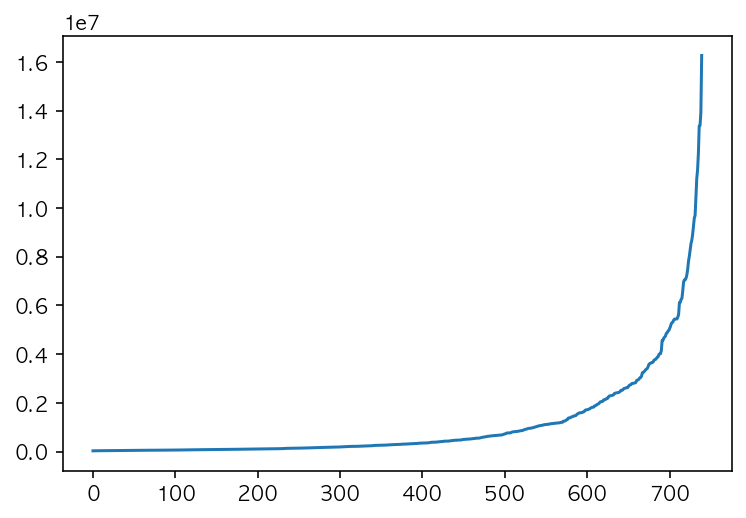

In [41]:
plt.plot(df1['aud_nationwide'].sort_values().reset_index(drop=True))

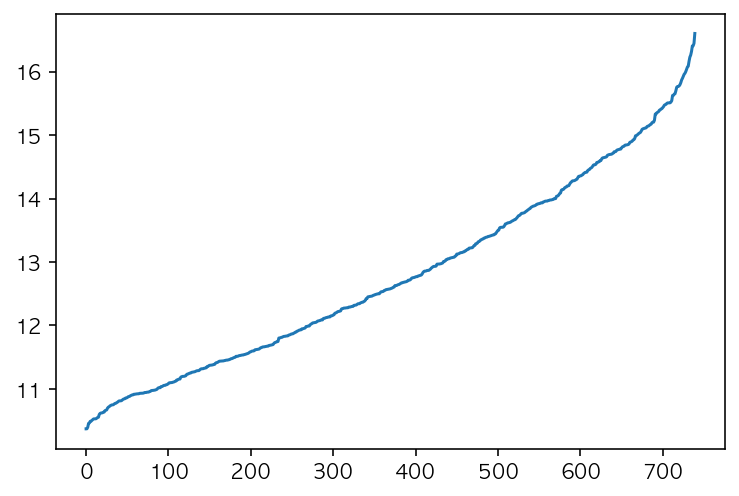

In [42]:
plt.plot(np.log(df1['aud_nationwide'].sort_values().reset_index(drop=True)))

In [43]:
# 19개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times',
                 'rating_audiences', 'director_power', 'actor_power', 'before_news', 'after_news', 'director_movie_count', 'actor_movie_count']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'release_season', 'nation', 'genre', 'rate', 'C(sequel)', 'C(original)', 'C(holiday)']
model1 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     64.91
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          1.40e-206
Time:                        17:53:40   Log-Likelihood:                -773.83
No. Observations:                 740   AIC:                             1630.
Df Residuals:                     699   BIC:                             1819.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [44]:
# kfold 1

from sklearn.model_selection import KFold

kfold_dict['1'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df1)):
    df_train = df1.iloc[idx_train]
    df_test = df1.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'actor_power', 'before_news', 'after_news', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['1'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['1'])/10)

학습 R2 = 0.78627915, 검증 R2 = 0.78865891
학습 R2 = 0.78944498, 검증 R2 = 0.74821492
학습 R2 = 0.78440648, 검증 R2 = 0.71835146
학습 R2 = 0.79443008, 검증 R2 = 0.71076920
학습 R2 = 0.78769835, 검증 R2 = 0.77674553
학습 R2 = 0.79062247, 검증 R2 = 0.74163914
학습 R2 = 0.79221295, 검증 R2 = 0.70821734
학습 R2 = 0.79105677, 검증 R2 = 0.74334560
학습 R2 = 0.78719374, 검증 R2 = 0.77776778
학습 R2 = 0.79291088, 검증 R2 = 0.73119234


In [45]:
# model1의 테스트 R

pred = result1.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                               'actor_power', 'before_news', 'after_news', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7450429115135726

# model2

In [46]:
df2 = df1.copy()

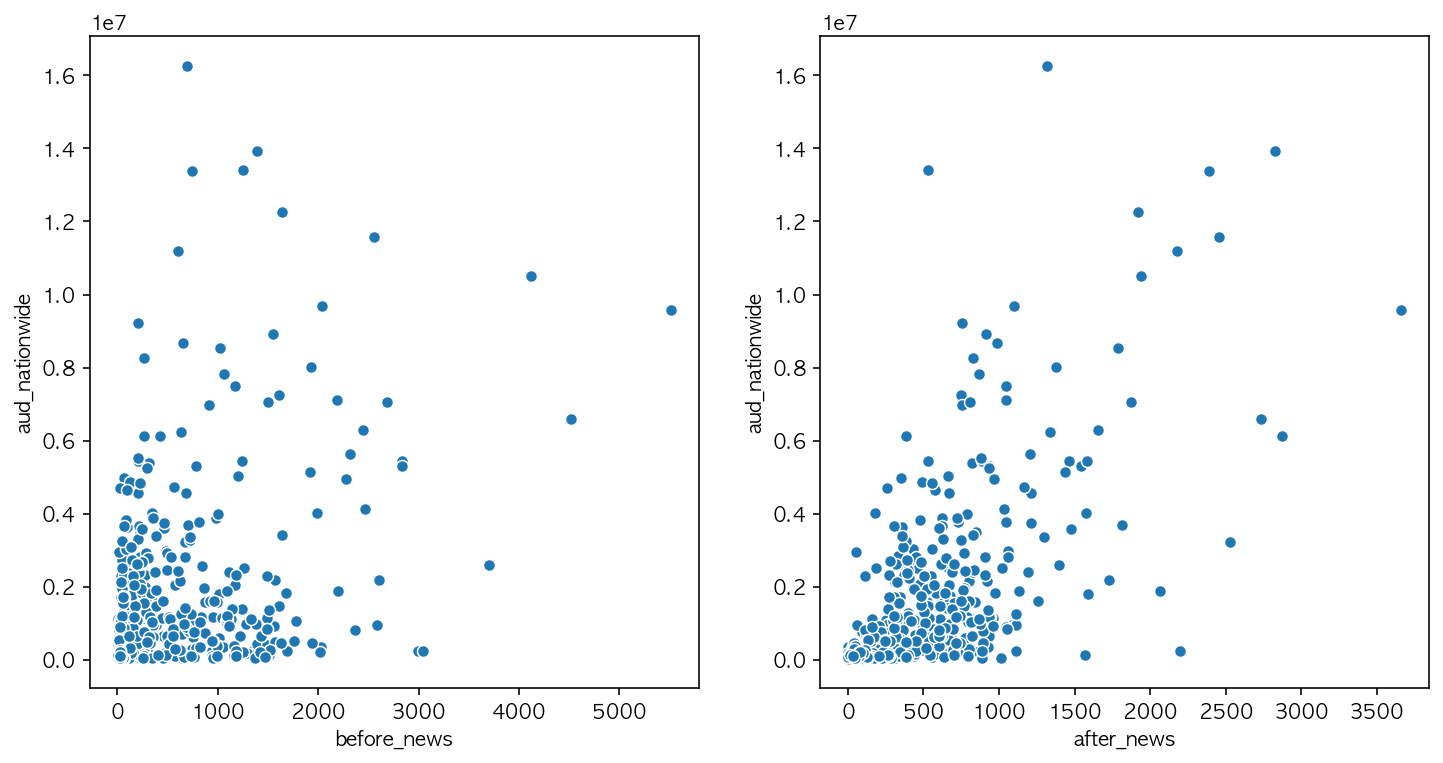

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.scatterplot(x="before_news", y="aud_nationwide", data=df2)
plt.subplot(122)
sns.scatterplot(x="after_news", y="aud_nationwide", data=df2)
plt.show()

In [48]:
df2_1 = df2.copy()

In [49]:
# 로그 취한값에 다시 루트 씌우기

df2_1['log_sqrt_before_news'] = df2_1['before_news'].apply(
    lambda news: np.log(news))
df2_1['log_sqrt_after_news'] = df2_1['after_news'].apply(
    lambda news: np.log(news))

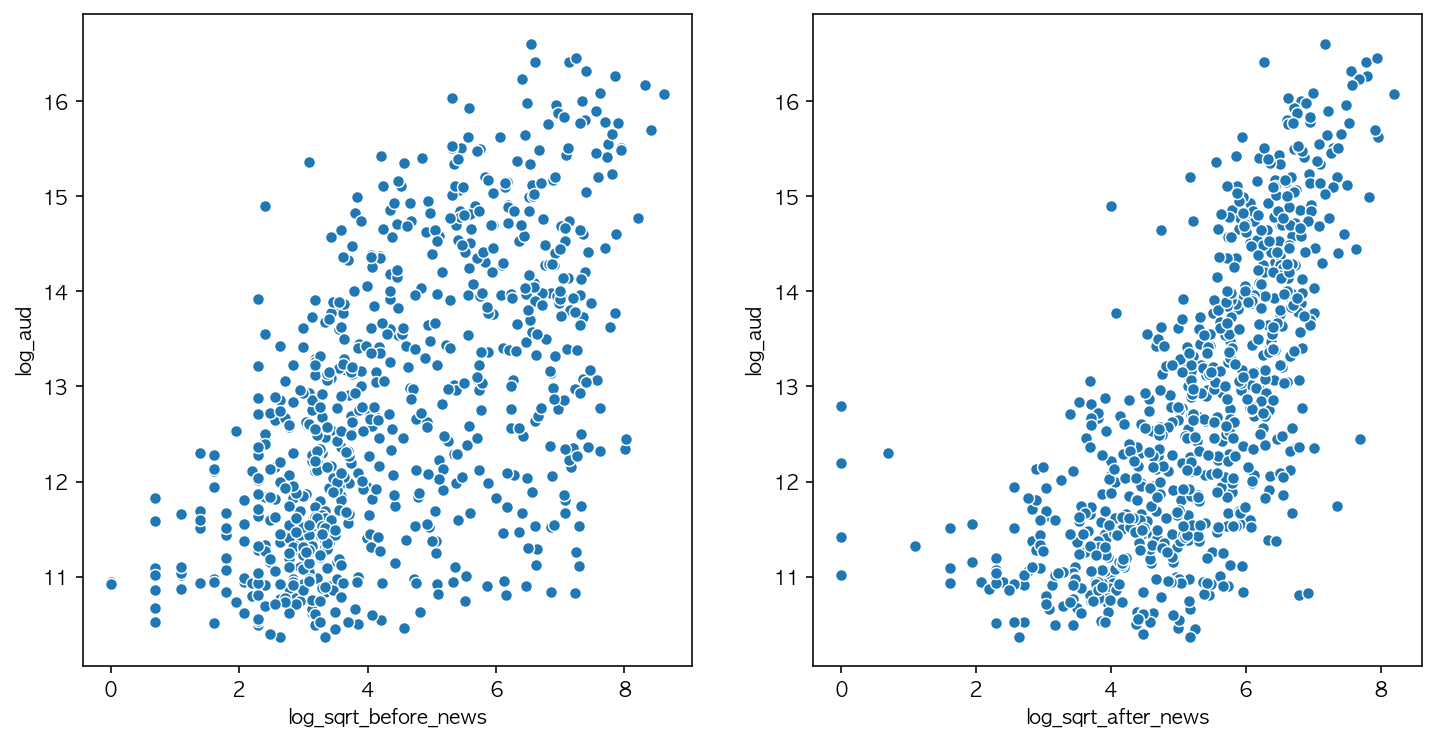

In [50]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.scatterplot(x="log_sqrt_before_news", y="log_aud", data=df2_1)
plt.subplot(122)
sns.scatterplot(x="log_sqrt_after_news", y="log_aud", data=df2_1)
plt.show()

In [51]:
df2['before_news_0to1'] = df2['before_news'].apply(
    lambda news: 1 if news == 0.0 else news)

In [52]:
df2['after_news_0to1'] = df2['after_news'].apply(
    lambda news: 1 if news == 0.0 else news)

In [53]:
# 19개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times',
                 'rating_audiences', 'director_power', 'actor_power', 'np.log(before_news_0to1)', 'np.log(after_news_0to1)', 'director_movie_count', 'actor_movie_count']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'release_season', 'nation', 'genre', 'rate', 'C(sequel)', 'C(original)', 'C(holiday)']
model2 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     69.85
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.75e-215
Time:                        17:53:44   Log-Likelihood:                -752.30
No. Observations:                 740   AIC:                             1587.
Df Residuals:                     699   BIC:                             1775.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [54]:
# kfold 2

from sklearn.model_selection import KFold

kfold_dict['2'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df2)):
    df_train = df2.iloc[idx_train]
    df_test = df2.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'actor_power', 'before_news_0to1', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['2'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['2'])/10)

학습 R2 = 0.79818529, 검증 R2 = 0.80353271
학습 R2 = 0.80119806, 검증 R2 = 0.76213256
학습 R2 = 0.79750672, 검증 R2 = 0.71754355
학습 R2 = 0.80463005, 검증 R2 = 0.74024221
학습 R2 = 0.79900140, 검증 R2 = 0.79526683
학습 R2 = 0.80327079, 검증 R2 = 0.74645206
학습 R2 = 0.80324063, 검증 R2 = 0.73370348
학습 R2 = 0.80338091, 검증 R2 = 0.75276801
학습 R2 = 0.80051272, 검증 R2 = 0.77602609
학습 R2 = 0.80498249, 검증 R2 = 0.74343113


In [55]:
X_test['before_news_0to1'] = X_test['before_news'].apply(
    lambda news: 1 if news == 0.0 else news)
X_test['after_news_0to1'] = X_test['after_news'].apply(
    lambda news: 1 if news == 0.0 else news)

In [56]:
# model2의 테스트 R

pred = result2.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                               'actor_power', 'before_news_0to1', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7494596891937573

# model3
- 아웃라이어 제거
- 576 어벤져스: 엔드게임

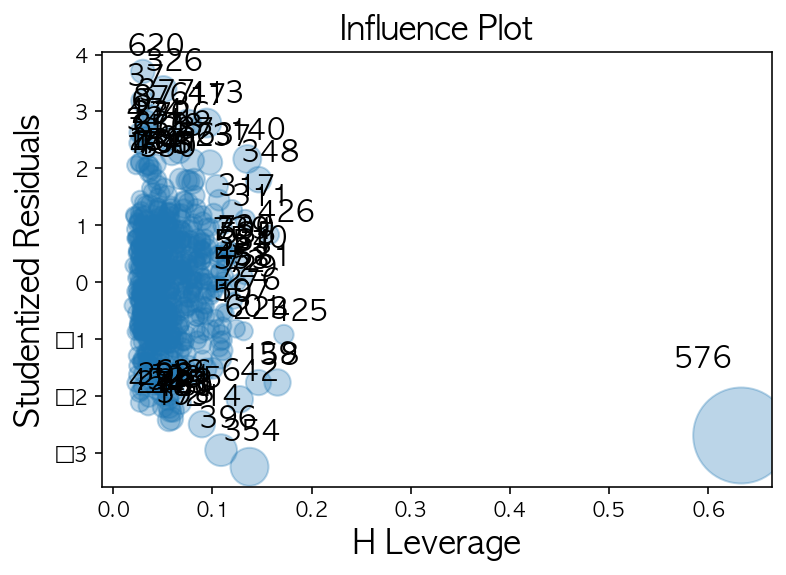

In [57]:
# Cook's distance

sm.graphics.influence_plot(result2, plot_alpha=0.3)
plt.show()

In [58]:
df3 = df2.copy()

In [59]:
df3 = df3.drop(index=[576])

In [60]:
# 19개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times',
                 'rating_audiences', 'director_power', 'actor_power', 'np.log(before_news_0to1)', 'np.log(after_news_0to1)', 'director_movie_count', 'actor_movie_count']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'release_season', 'nation', 'genre', 'rate', 'C(sequel)', 'C(original)', 'C(holiday)']
model3 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     69.94
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.78e-215
Time:                        17:53:48   Log-Likelihood:                -747.96
No. Observations:                 739   AIC:                             1578.
Df Residuals:                     698   BIC:                             1767.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [61]:
# kfold 3

from sklearn.model_selection import KFold

kfold_dict['3'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df3)):
    df_train = df3.iloc[idx_train]
    df_test = df3.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'actor_power', 'before_news_0to1', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['3'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['3'])/10)

학습 R2 = 0.79674209, 검증 R2 = 0.81764854
학습 R2 = 0.80275261, 검증 R2 = 0.75523690
학습 R2 = 0.79429431, 검증 R2 = 0.82230823
학습 R2 = 0.80414737, 검증 R2 = 0.73599316
학습 R2 = 0.80214979, 검증 R2 = 0.77132949
학습 R2 = 0.80341804, 검증 R2 = 0.74714580
학습 R2 = 0.80731133, 검증 R2 = 0.65061865
학습 R2 = 0.80392342, 검증 R2 = 0.75342377
학습 R2 = 0.80086297, 검증 R2 = 0.77811007
학습 R2 = 0.80236472, 검증 R2 = 0.77021901


In [62]:
# model3의 테스트 R

pred = result3.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                               'actor_power', 'before_news_0to1', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'director_movie_count', 'actor_movie_count', 'holiday']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7555539116591337

# model4
- p-value 높은 실수변수 다 제거하기
    - holiday 제거
    - running_times 제거
    - director_movie_count 제거
    - actor_movie_count 제거
    - actor_power 제거
    - expert_rating 제거

In [63]:
df4 = df3.copy()

In [64]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(df4.corr(), annot=True, cmap="YlGnBu")

# plt.show()

In [65]:
# 러닝타임과 그 관객수

# plt.figure(figsize=(6, 6))
# plt.scatter(np.log(df4["running_times"]), df4["log_aud"])

# plt.show()

In [66]:
# # 장르별 러닝타임과 그 관객수

# plt.figure(figsize=(8, 16))
# plt.subplot(411)
# plt.scatter(df1[df1["genre"] == "판타지"]["running_times"], df1[df1["genre"] == "판타지"]["log_aud"])
# plt.subplot(412)
# plt.scatter(np.log(df1[df1["genre"] == "액션"]["running_times"]), df1[df1["genre"] == "액션"]["log_aud"])

# plt.show()

In [67]:
# 13개의 독립변수 사용

feature_names = ['screen', 'audience_rating',
                 'rating_audiences', 'director_power', 'np.log(before_news_0to1)', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'release_season', 'nation', 'genre', 'rate', 'C(sequel)', 'C(original)']
model4 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df4)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     82.52
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.85e-220
Time:                        17:53:51   Log-Likelihood:                -749.65
No. Observations:                 739   AIC:                             1569.
Df Residuals:                     704   BIC:                             1730.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [68]:
# print(result4.t_test("release_season[T.spring] = release_season[T.summer]"))

In [69]:
# kfold 4

from sklearn.model_selection import KFold

kfold_dict['4'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df4)):
    df_train = df4.iloc[idx_train]
    df_test = df4.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['4'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['4'])/10)

학습 R2 = 0.79591511, 검증 R2 = 0.81801244
학습 R2 = 0.80137457, 검증 R2 = 0.76103091
학습 R2 = 0.79360865, 검증 R2 = 0.81992737
학습 R2 = 0.80247198, 검증 R2 = 0.74706168
학습 R2 = 0.79988378, 검증 R2 = 0.78863233
학습 R2 = 0.80242698, 검증 R2 = 0.74992285
학습 R2 = 0.80637821, 검증 R2 = 0.66006194
학습 R2 = 0.80326960, 검증 R2 = 0.75128651
학습 R2 = 0.79987589, 검증 R2 = 0.78112170
학습 R2 = 0.80096737, 검증 R2 = 0.77431246


In [70]:
# model4의 테스트 R

pred = result4.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                               'before_news_0to1', 'after_news_0to1', 'dist_cat', 'release_season', 'nation', 'genre', 'rate', 'sequel', 'original']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7547044566508584

In [71]:
# fig = plt.figure(figsize=(12, 36))
# sm.graphics.plot_partregress_grid(result4, fig=fig);

In [72]:
# sm.stats.anova_lm(result4, typ=2)

# model5
- release_season 제거
- nation 제거
- rate 제거


In [73]:
df5 = df4.copy()

In [74]:
# 10개의 독립변수 사용

feature_names = ['screen', 'audience_rating',
                 'rating_audiences', 'director_power', 'np.log(before_news_0to1)', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'genre', 'C(sequel)', 'C(original)']
model5 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df5)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.33e-228
Time:                        17:53:52   Log-Likelihood:                -756.85
No. Observations:                 739   AIC:                             1562.
Df Residuals:                     715   BIC:                             1672.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [75]:
# kfold 5

from sklearn.model_selection import KFold

kfold_dict['5'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df5)):
    df_train = df5.iloc[idx_train]
    df_test = df5.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'genre', 'sequel', 'original', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['5'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['5'])/10)

학습 R2 = 0.79080470, 검증 R2 = 0.82676176
학습 R2 = 0.79727244, 검증 R2 = 0.76006997
학습 R2 = 0.78868852, 검증 R2 = 0.82761268
학습 R2 = 0.79890020, 검증 R2 = 0.74237637
학습 R2 = 0.79536091, 검증 R2 = 0.79251767
학습 R2 = 0.79865563, 검증 R2 = 0.74940611
학습 R2 = 0.80297221, 검증 R2 = 0.65351528
학습 R2 = 0.79967327, 검증 R2 = 0.74651945
학습 R2 = 0.79542921, 검증 R2 = 0.78585440
학습 R2 = 0.79578999, 검증 R2 = 0.78334422


In [76]:
# model5의 테스트 R

pred = result5.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                               'before_news_0to1', 'after_news_0to1', 'dist_cat', 'genre', 'sequel', 'original']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7539352195668418

# model6
- original 제거
- genre 제거

In [77]:
df6 = df5.copy()

In [78]:
sm.stats.anova_lm(result5, typ=2)

,sum_sq,df,F,PR(>F)
dist_cat,15.346037,2.0,16.350756,1.139088e-07
genre,8.663236,13.0,1.420066,1.441029e-01
C(sequel),8.979366,1.0,19.134507,1.399524e-05
C(original),0.728438,1.0,1.552260,2.132103e-01
scale(screen),137.470730,1.0,292.942126,2.677196e-55
scale(audience_rating),8.810564,1.0,18.774799,1.681656e-05
scale(rating_audiences),8.745854,1.0,18.636905,1.804428e-05
scale(director_power),2.844227,1.0,6.060883,1.405579e-02
scale(np.log(before_news_0to1)),1.931977,1.0,4.116931,4.282605e-02
scale(np.log(after_news_0to1)),11.487031,1.0,24.478196,9.378180e-07


In [79]:
# 8개의 독립변수 사용

feature_names = ['screen', 'audience_rating',
                 'rating_audiences', 'director_power', 'np.log(before_news_0to1)', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name) for name in feature_names] + ['dist_cat',
                                                                        'C(sequel)']
model6 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df6)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     304.6
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          3.65e-240
Time:                        17:53:54   Log-Likelihood:                -766.73
No. Observations:                 739   AIC:                             1553.
Df Residuals:                     729   BIC:                             1600.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [80]:
# kfold 6

from sklearn.model_selection import KFold

kfold_dict['6'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df6)):
    df_train = df6.iloc[idx_train]
    df_test = df6.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['6'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['6'])/10)

학습 R2 = 0.78569991, 검증 R2 = 0.82080764
학습 R2 = 0.79147152, 검증 R2 = 0.76398466
학습 R2 = 0.78117640, 검증 R2 = 0.84889407
학습 R2 = 0.79250661, 검증 R2 = 0.74876185
학습 R2 = 0.78913831, 검증 R2 = 0.79548980
학습 R2 = 0.79304510, 검증 R2 = 0.74956880
학습 R2 = 0.79797130, 검증 R2 = 0.64611277
학습 R2 = 0.79345032, 검증 R2 = 0.74904958
학습 R2 = 0.78842886, 검증 R2 = 0.80256340
학습 R2 = 0.79058273, 검증 R2 = 0.78052656


In [81]:
# model6의 테스트 R

pred = result6.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                               'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7550619432032872

# model7
- before_news 빼기

In [82]:
df7 = df6.copy()

In [83]:
sm.stats.anova_lm(result6, typ=2)

,sum_sq,df,F,PR(>F)
dist_cat,15.985615,2.0,16.907449,6.643515e-08
C(sequel),9.644811,1.0,20.401987,7.319174e-06
scale(screen),170.536317,1.0,360.741089,1.172547e-65
scale(audience_rating),7.349416,1.0,15.546461,8.826437e-05
scale(rating_audiences),8.953658,1.0,18.939968,1.541650e-05
scale(director_power),3.184884,1.0,6.737090,9.632885e-03
scale(np.log(before_news_0to1)),1.220655,1.0,2.582093,1.085117e-01
scale(np.log(after_news_0to1)),11.390673,1.0,24.095066,1.132148e-06
Residual,344.626601,729.0,NaN,NaN


In [84]:
# 7개의 독립변수 사용

feature_names = ['screen', 'audience_rating',
                 'rating_audiences', 'director_power', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model7 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     341.6
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          6.92e-241
Time:                        17:53:55   Log-Likelihood:                -768.03
No. Observations:                 739   AIC:                             1554.
Df Residuals:                     730   BIC:                             1596.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [85]:
# kfold 7

from sklearn.model_selection import KFold

kfold_dict['7'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df7)):
    df_train = df7.iloc[idx_train]
    df_test = df7.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'after_news_0to1', 'dist_cat', 'sequel', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['7'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['7'])/10)

학습 R2 = 0.78475994, 검증 R2 = 0.82164190
학습 R2 = 0.78979253, 검증 R2 = 0.77377698
학습 R2 = 0.78057639, 검증 R2 = 0.84687093
학습 R2 = 0.79176697, 검증 R2 = 0.74747524
학습 R2 = 0.78863525, 검증 R2 = 0.79254818
학습 R2 = 0.79242960, 검증 R2 = 0.74738918
학습 R2 = 0.79718204, 검증 R2 = 0.64564564
학습 R2 = 0.79288636, 검증 R2 = 0.74656349
학습 R2 = 0.78764079, 검증 R2 = 0.80227850
학습 R2 = 0.79017146, 검증 R2 = 0.77786743


In [86]:
# model7의 테스트 R

pred = result7.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                               'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7573364726117136

# model8
- screen의 잔차 잡아주기

In [87]:
df8 = df7.copy()

In [88]:
sm.stats.anova_lm(result7, typ=2)

,sum_sq,df,F,PR(>F)
dist_cat,15.930836,2.0,16.813073,7.267008e-08
C(sequel),8.918717,1.0,18.825257,1.634414e-05
scale(screen),169.662825,1.0,358.117232,2.731944e-65
scale(audience_rating),7.085373,1.0,14.955512,1.199001e-04
scale(rating_audiences),9.630435,1.0,20.327520,7.599980e-06
scale(director_power),2.991247,1.0,6.313799,1.219463e-02
scale(np.log(after_news_0to1)),37.301641,1.0,78.734751,5.422858e-18
Residual,345.847257,730.0,NaN,NaN


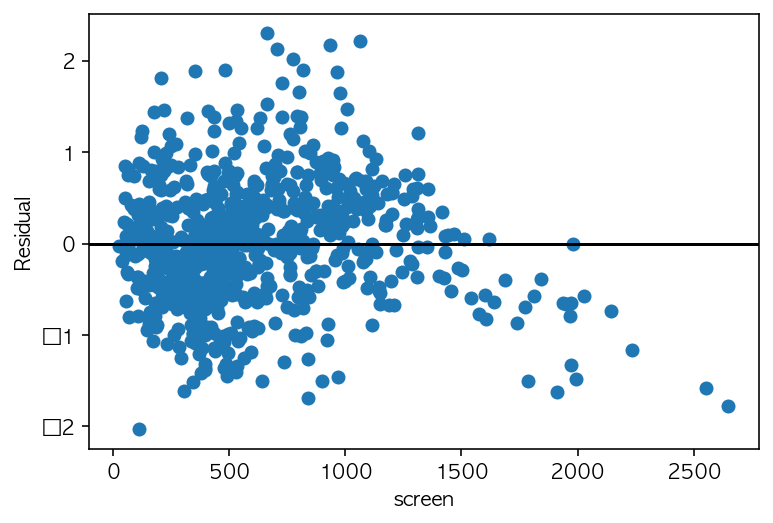

In [89]:
plt.plot(df7['screen'], result7.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("screen")
plt.ylabel("Residual")
plt.show()

In [90]:
df8.columns

Index(['title', 'director', 'distributor', 'release_date', 'release_season',
       'nation', 'screen', 'genre', 'rate', 'type', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_movie_count', 'actor_movie_count',
       'before_news', 'after_news', 'holiday', 'dist_cat', 'aud_nationwide',
       'log_aud', 'before_news_0to1', 'after_news_0to1'],
      dtype='object')

In [91]:
# 7개의 독립변수 사용

feature_names = ['screen**(4/7)', 'audience_rating',
                 'rating_audiences', 'director_power', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model8 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df8)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     357.6
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          1.27e-246
Time:                        17:54:04   Log-Likelihood:                -754.64
No. Observations:                 739   AIC:                             1527.
Df Residuals:                     730   BIC:                             1569.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [92]:
# kfold 8

from sklearn.model_selection import KFold

kfold_dict['8'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df8)):
    df_train = df8.iloc[idx_train]
    df_test = df8.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'after_news_0to1', 'dist_cat', 'sequel', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['8'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['8'])/10)

학습 R2 = 0.79192318, 검증 R2 = 0.83162893
학습 R2 = 0.79644651, 검증 R2 = 0.79007870
학습 R2 = 0.78832342, 검증 R2 = 0.85338197
학습 R2 = 0.79890525, 검증 R2 = 0.76153849
학습 R2 = 0.79837308, 검증 R2 = 0.77804196
학습 R2 = 0.79985334, 검증 R2 = 0.75828942
학습 R2 = 0.80685821, 검증 R2 = 0.62316715
학습 R2 = 0.79918464, 검증 R2 = 0.76705716
학습 R2 = 0.79464077, 검증 R2 = 0.81468926
학습 R2 = 0.79558479, 검증 R2 = 0.80127041


In [93]:
# X_test['dist_cat_02'] = X_test['dist_cat'].apply(lambda dist: 'A' if dist == 'B' else dist)

In [94]:
# model8의 테스트 R

pred = result8.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                               'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7708885967978812

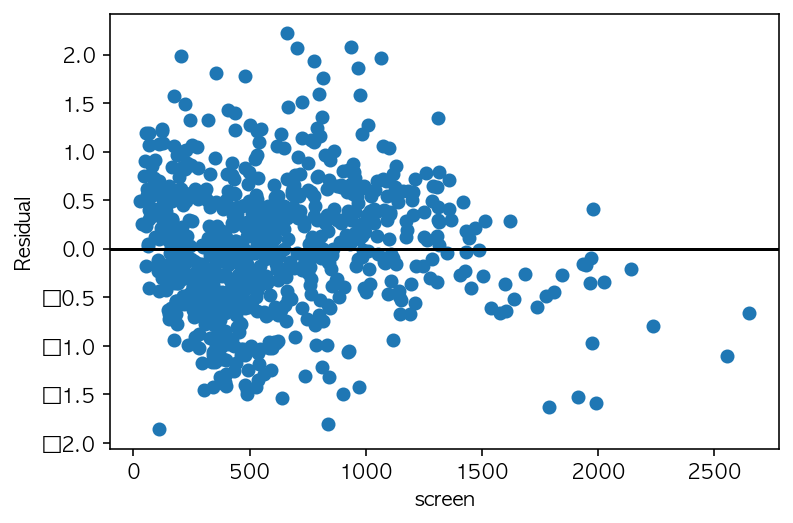

In [95]:
plt.plot(df7['screen'], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("screen")
plt.ylabel("Residual")
plt.show()

# model9
- rating_audiences의 잔차 잡아주기

In [96]:
df9 = df8.copy()

In [97]:
sm.stats.anova_lm(result8, typ=2)

,sum_sq,df,F,PR(>F)
dist_cat,6.857136,2.0,7.504090,5.943796e-04
C(sequel),7.975374,1.0,17.455664,3.296965e-05
scale(screen ** (4 / 7)),181.978040,1.0,398.294475,4.718498e-71
scale(audience_rating),6.055000,1.0,13.252551,2.914260e-04
scale(rating_audiences),21.052131,1.0,46.076700,2.355322e-11
scale(director_power),1.138979,1.0,2.492878,1.147956e-01
scale(np.log(after_news_0to1)),24.582706,1.0,53.804052,5.905044e-13
Residual,333.532042,730.0,NaN,NaN


In [98]:
df9.columns

Index(['title', 'director', 'distributor', 'release_date', 'release_season',
       'nation', 'screen', 'genre', 'rate', 'type', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_movie_count', 'actor_movie_count',
       'before_news', 'after_news', 'holiday', 'dist_cat', 'aud_nationwide',
       'log_aud', 'before_news_0to1', 'after_news_0to1'],
      dtype='object')

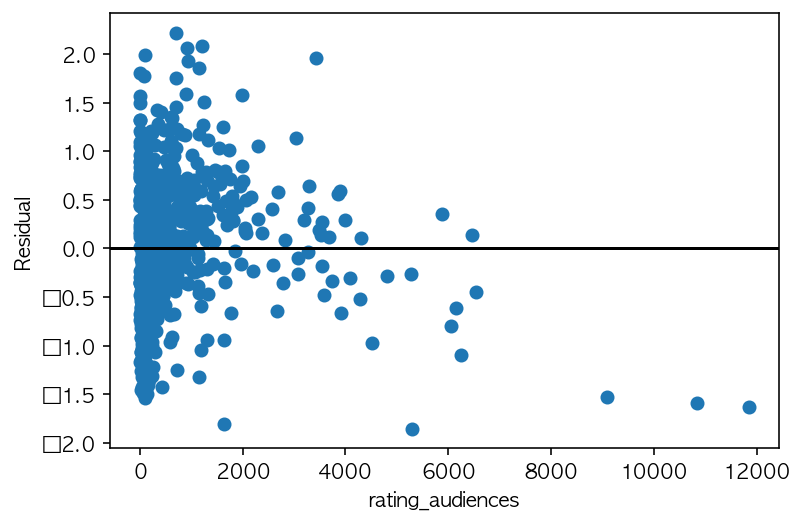

In [99]:
plt.plot(df9['rating_audiences'], result8.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

In [100]:
# 7개의 독립변수 사용

feature_names = ['screen**(4/7)', 'audience_rating',
                 'rating_audiences**(3/7)', 'director_power', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model9 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df9)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     422.6
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          5.09e-268
Time:                        17:54:13   Log-Likelihood:                -704.66
No. Observations:                 739   AIC:                             1427.
Df Residuals:                     730   BIC:                             1469.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [101]:
# kfold 9

from sklearn.model_selection import KFold

kfold_dict['9'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df9)):
    df_train = df9.iloc[idx_train]
    df_test = df9.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences', 'director_power',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel', 'holiday']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['9'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['9'])/10)

학습 R2 = 0.81715713, 검증 R2 = 0.86126478
학습 R2 = 0.82106957, 검증 R2 = 0.82696078
학습 R2 = 0.81955845, 검증 R2 = 0.82889327
학습 R2 = 0.82336740, 검증 R2 = 0.80135981
학습 R2 = 0.82562935, 검증 R2 = 0.78894979
학습 R2 = 0.82652019, 검증 R2 = 0.77625470
학습 R2 = 0.83077150, 검증 R2 = 0.67915120
학습 R2 = 0.82327134, 검증 R2 = 0.80933933
학습 R2 = 0.82026077, 검증 R2 = 0.84188798
학습 R2 = 0.81970028, 검증 R2 = 0.83904591


In [102]:
# model9의 테스트 R

pred = result9.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                               'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8162454376098636

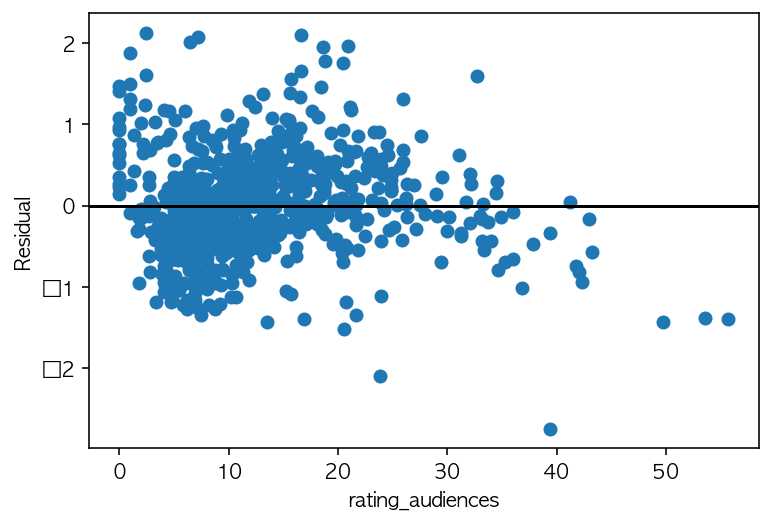

In [112]:
plt.plot((df9['rating_audiences'])**(3/7), result9.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

# model10
- rating_audiences 잔차 한번더 처리

In [113]:
df10 = df9.copy()

In [114]:
sm.stats.anova_lm(result9, typ=2)

,sum_sq,df,F,PR(>F)
dist_cat,3.566333,2.0,4.468036,1.178521e-02
C(sequel),3.996740,1.0,10.014532,1.617555e-03
scale(screen ** (4 / 7)),97.578821,1.0,244.500823,9.461593e-48
scale(audience_rating),0.633230,1.0,1.586667,2.082055e-01
scale(rating_audiences ** (3 / 7)),63.245525,1.0,158.472737,5.006434e-33
scale(director_power),1.070881,1.0,2.683281,1.018375e-01
scale(np.log(after_news_0to1)),17.703455,1.0,44.359106,5.379044e-11
Residual,291.338648,730.0,NaN,NaN


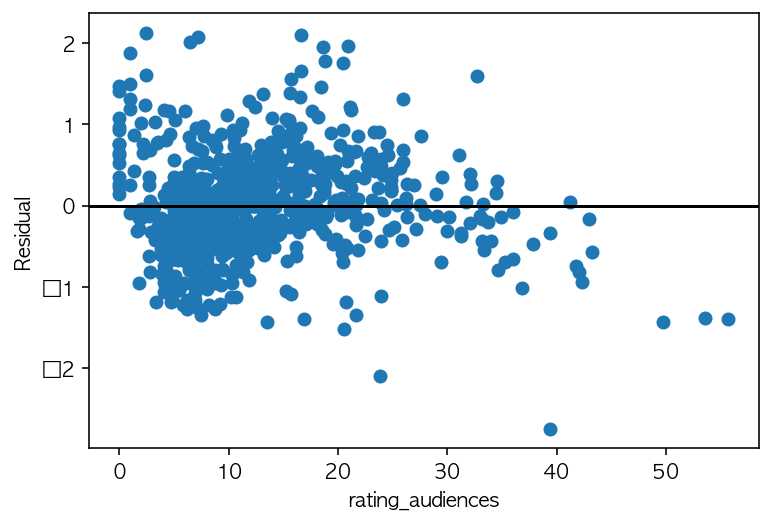

In [120]:
plt.plot((df10['rating_audiences'])**(3/7), result9.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

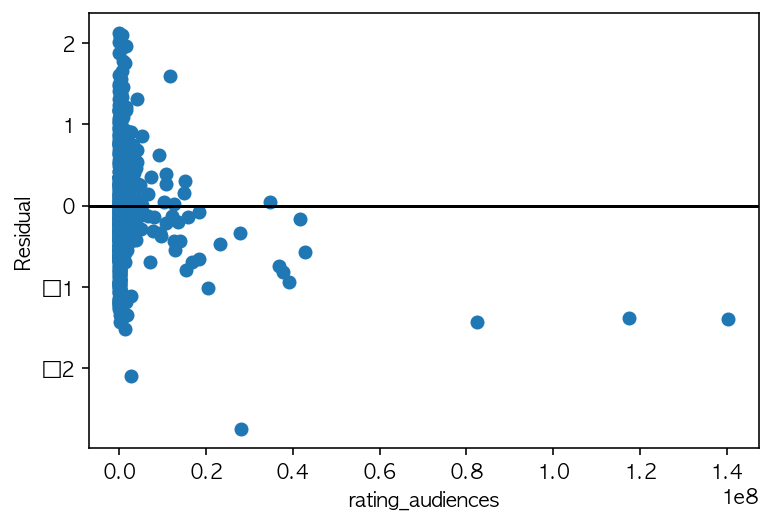

In [121]:
plt.plot((df10['rating_audiences'])**(2), result9.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

In [123]:
# 7개의 독립변수 사용

feature_names = ['screen**(4/7)', 'audience_rating',
                 'rating_audiences**(3/7)', 'rating_audiences**2', 'director_power', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model10 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df10)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     402.1
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          9.07e-276
Time:                        18:03:15   Log-Likelihood:                -683.43
No. Observations:                 739   AIC:                             1387.
Df Residuals:                     729   BIC:                             1433.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

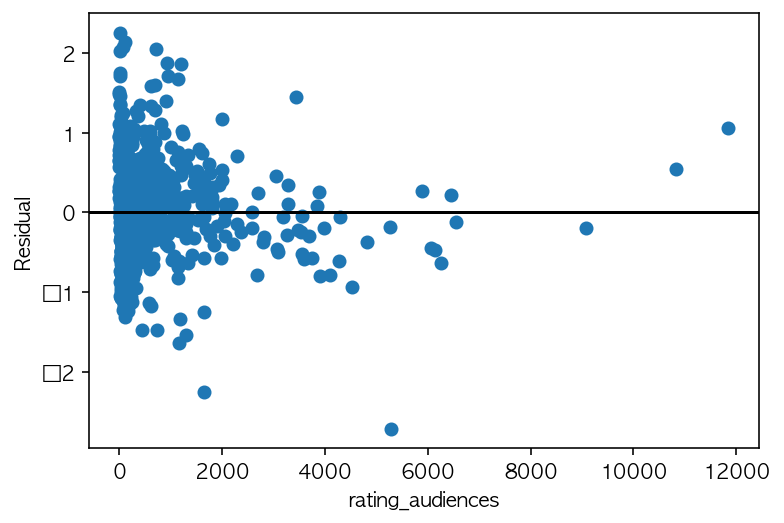

In [124]:
plt.plot(df10['rating_audiences'], result10.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

In [125]:
# kfold 10

from sklearn.model_selection import KFold

kfold_dict['10'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df10)):
    df_train = df10.iloc[idx_train]
    df_test = df10.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                                   'after_news_0to1', 'dist_cat', 'sequel']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['10'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['10'])/10)

학습 R2 = 0.82712484, 검증 R2 = 0.87094827
학습 R2 = 0.83112841, 검증 R2 = 0.83637556
학습 R2 = 0.83064066, 검증 R2 = 0.82854222
학습 R2 = 0.83235779, 검증 R2 = 0.82133940
학습 R2 = 0.83671655, 검증 R2 = 0.78689574
학습 R2 = 0.83615654, 검증 R2 = 0.78955903
학습 R2 = 0.84111769, 검증 R2 = 0.66978751
학습 R2 = 0.83276635, 검증 R2 = 0.82380547
학습 R2 = 0.83031110, 검증 R2 = 0.85062182
학습 R2 = 0.82852765, 검증 R2 = 0.85628941


In [126]:
# model10의 테스트 R

pred = result10.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                                'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8279916236862361

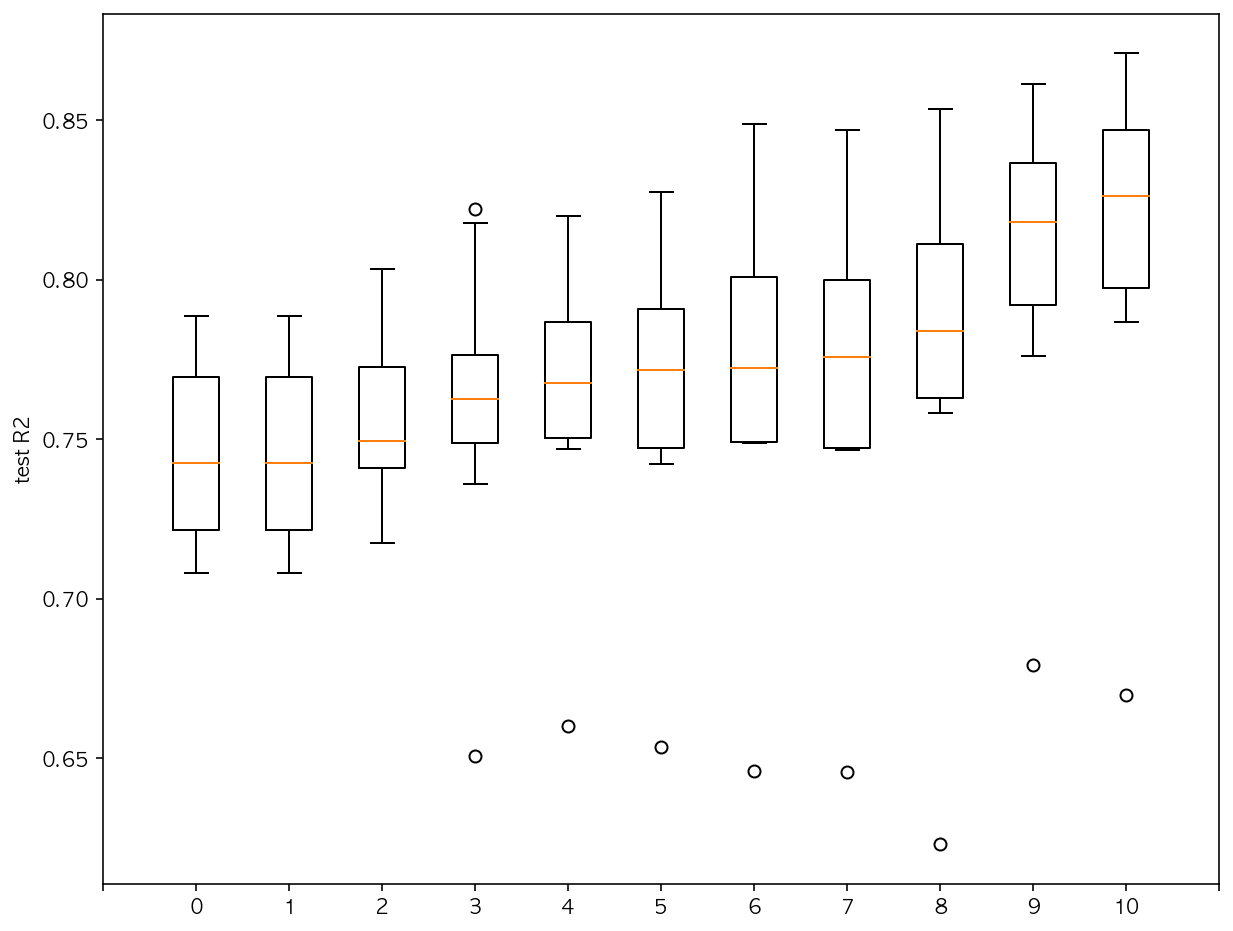

In [127]:
for i in range(0, len(kfold_dict)):
    kfold_df[str(i)] = kfold_dict[str(i)]

plt.figure(figsize=(10, 8))
plt.boxplot((kfold_df['0'], kfold_df['1'],
             kfold_df['2'], kfold_df['3'], kfold_df['4'], kfold_df['5'], kfold_df['6'], kfold_df['7'], kfold_df['8'], kfold_df['9'], kfold_df['10']))
plt.ylabel("test R2")
plt.xticks(np.arange(13), ('', '0', '1', '2', '3',
                           '4', '5', '6', '7', '8', '9', '10'))

plt.show()

# model11
- screen의 잔차 잡아주기

In [128]:
df11 = df10.copy()

In [129]:
# df11.corr()

In [130]:
# sm.stats.anova_lm(result10, typ=2)

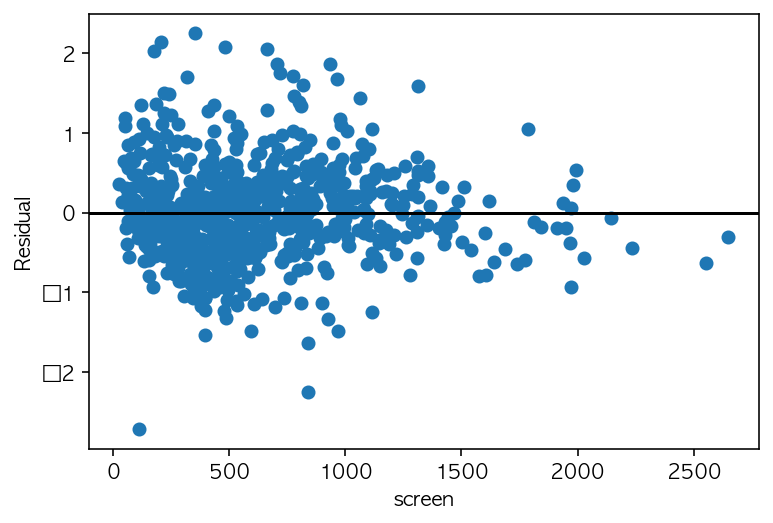

In [131]:
plt.plot(df11['screen'], result10.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("screen")
plt.ylabel("Residual")
plt.show()

In [132]:
# 8개의 독립변수 사용

feature_names = ['screen**(4/7)', 'audience_rating', 'np.log(screen)',
                 'rating_audiences**(3/7)', 'rating_audiences**2', 'director_power', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model11 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df11)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     366.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          2.68e-276
Time:                        18:03:19   Log-Likelihood:                -679.11
No. Observations:                 739   AIC:                             1380.
Df Residuals:                     728   BIC:                             1431.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [133]:
# kfold 11

from sklearn.model_selection import KFold

kfold_dict['11'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df11)):
    df_train = df11.iloc[idx_train]
    df_test = df11.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                                   'after_news_0to1', 'dist_cat', 'sequel']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['11'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['11'])/10)

학습 R2 = 0.82932112, 검증 R2 = 0.87107594
학습 R2 = 0.83326301, 검증 R2 = 0.83644666
학습 R2 = 0.83257108, 검증 R2 = 0.83081841
학습 R2 = 0.83446083, 검증 R2 = 0.82124088
학습 R2 = 0.83776901, 검증 R2 = 0.79617975
학습 R2 = 0.83792177, 검증 R2 = 0.79341890
학습 R2 = 0.84244799, 검증 R2 = 0.67787574
학습 R2 = 0.83539493, 검증 R2 = 0.81825004
학습 R2 = 0.83236269, 검증 R2 = 0.85167054
학습 R2 = 0.83132161, 검증 R2 = 0.85123096


In [134]:
# model11의 테스트 R

pred = result11.predict(X_test[['screen', 'audience_rating', 'rating_audiences', 'director_power',
                                'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8271531446896478

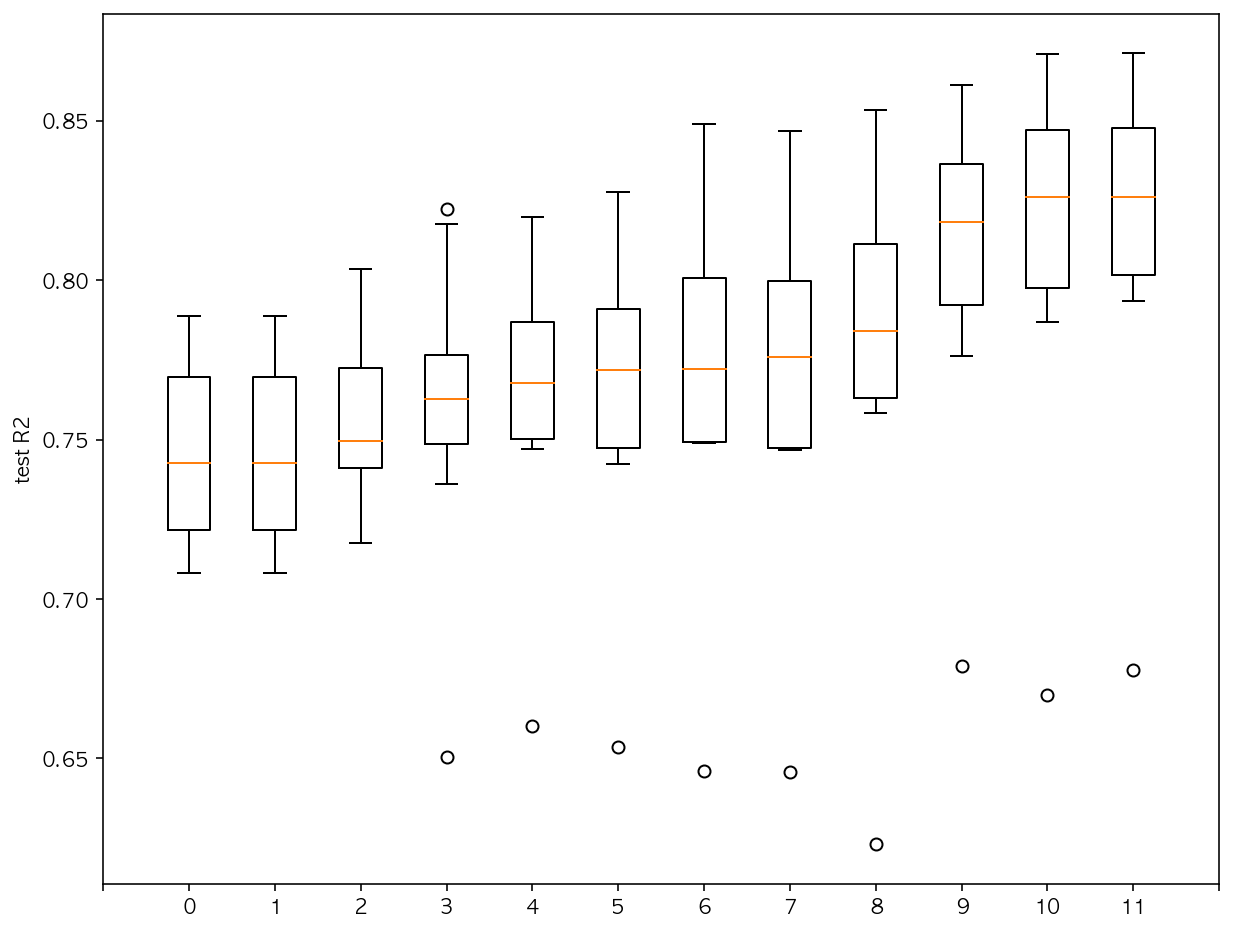

In [135]:
for i in range(0, len(kfold_dict)):
    kfold_df[str(i)] = kfold_dict[str(i)]

plt.figure(figsize=(10, 8))
plt.boxplot((kfold_df['0'], kfold_df['1'],
             kfold_df['2'], kfold_df['3'], kfold_df['4'], kfold_df['5'], kfold_df['6'], kfold_df['7'], kfold_df['8'], kfold_df['9'], kfold_df['10'], kfold_df['11']))
plt.ylabel("test R2")
plt.xticks(np.arange(14), ('', '0', '1', '2', '3',
                           '4', '5', '6', '7', '8', '9', '10', '11'))

plt.show()

# model12
- director_power 컬럼 제거

In [136]:
df12 = df11.copy()

In [137]:
# df12.columns

In [138]:
# Cook's distance

# sm.graphics.influence_plot(result11, plot_alpha=0.3)
# plt.show()

In [139]:
# df12.iloc[398]

In [140]:
# df12.describe()

In [141]:
len(df12)

739

In [142]:
# df12 = df12.drop(df12.index[[361, 398]])

In [143]:
# fig = plt.figure(figsize=(10, 20))
# sm.graphics.plot_partregress_grid(result8, fig=fig);

In [144]:
# sm.stats.anova_lm(result11, typ=2)

In [145]:
# 6개의 독립변수 사용

feature_names = ['screen**(4/7)', 'audience_rating', 'np.log(screen)',
                 'rating_audiences**(3/7)', 'rating_audiences**2', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model12 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df12)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     405.8
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          5.32e-277
Time:                        18:03:21   Log-Likelihood:                -680.55
No. Observations:                 739   AIC:                             1381.
Df Residuals:                     729   BIC:                             1427.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [146]:
# kfold 12

from sklearn.model_selection import KFold

kfold_dict['12'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df12)):
    df_train = df12.iloc[idx_train]
    df_test = df12.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'rating_audiences',
                                   'after_news_0to1', 'dist_cat', 'sequel']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['12'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['12'])/10)

학습 R2 = 0.82879820, 검증 R2 = 0.86947027
학습 R2 = 0.83271865, 검증 R2 = 0.83489757
학습 R2 = 0.83231159, 검증 R2 = 0.82769838
학습 R2 = 0.83315904, 검증 R2 = 0.82857726
학습 R2 = 0.83730633, 검증 R2 = 0.79392623
학습 R2 = 0.83769734, 검증 R2 = 0.78926417
학습 R2 = 0.84199598, 검증 R2 = 0.67205046
학습 R2 = 0.83399869, 검증 R2 = 0.82666934
학습 R2 = 0.83170441, 검증 R2 = 0.85108406
학습 R2 = 0.83027275, 검증 R2 = 0.85434898


In [147]:
# model12의 테스트 R

pred = result12.predict(X_test[['screen', 'audience_rating', 'rating_audiences',
                                'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8255692172697012

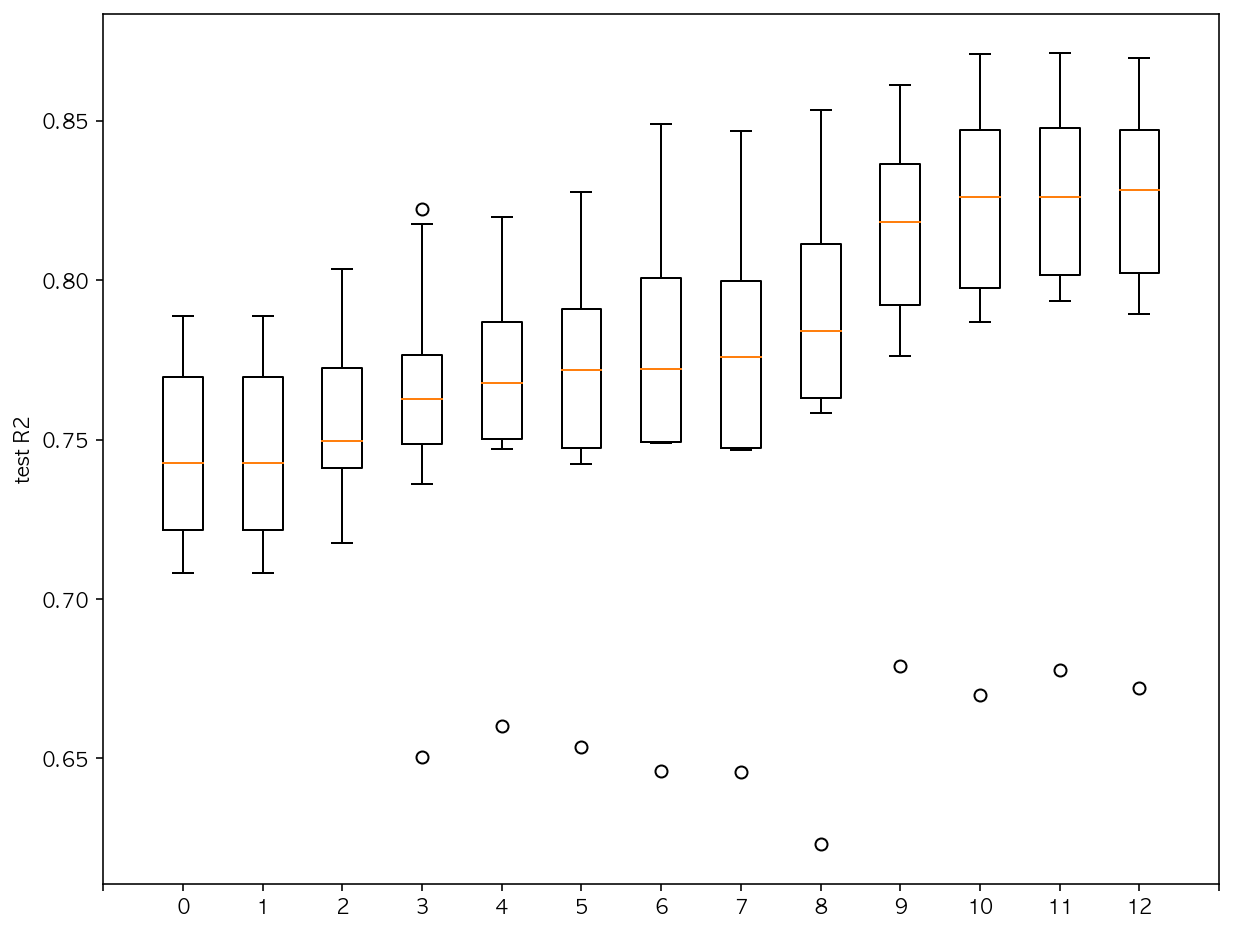

In [148]:
for i in range(0, len(kfold_dict)):
    kfold_df[str(i)] = kfold_dict[str(i)]

plt.figure(figsize=(10, 8))
plt.boxplot((kfold_df['0'], kfold_df['1'],
             kfold_df['2'], kfold_df['3'], kfold_df['4'], kfold_df['5'], kfold_df['6'], kfold_df['7'], kfold_df['8'], kfold_df['9'], kfold_df['10'], kfold_df['11'], kfold_df['12']))
plt.ylabel("test R2")
plt.xticks(np.arange(15), ('', '0', '1', '2', '3', '4',
                           '5', '6', '7', '8', '9', '10', '11', '12'))

plt.show()

# model13
- 아웃라이어 제거 
    - 39 부산행
    - 354 옥자   -> 왜 아웃라이어지?
    - 398 캡틴 아메리카: 시빌 워

In [149]:
df13 = df12.copy()

In [150]:
# sm.stats.anova_lm(result12, typ=2)

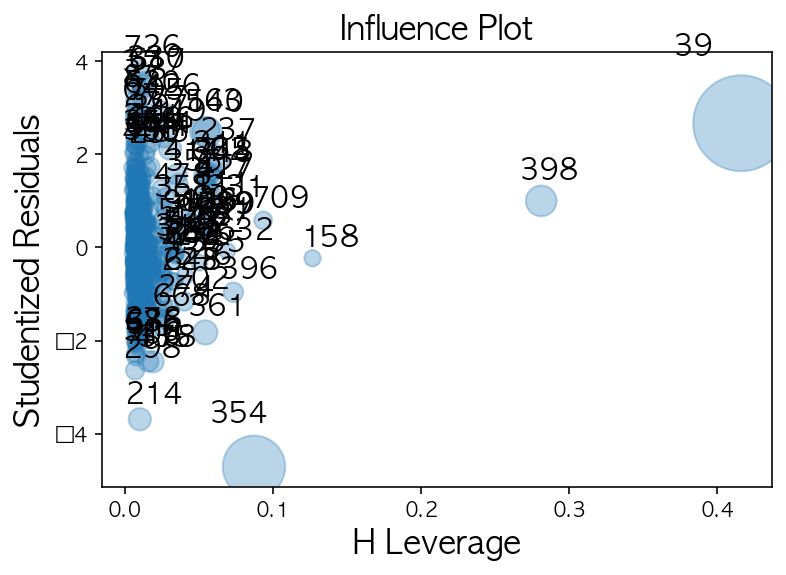

In [151]:
# Cook's distance

sm.graphics.influence_plot(result12, plot_alpha=0.3)
plt.show()

In [152]:
df13.iloc[354]

title                                    옥자
director                                봉준호
distributor             (주)넥스트엔터테인먼트월드(NEW)
release_date                       20170629
release_season                       summer
nation                                   미국
screen                                  111
genre                                  어드벤처
rate                               12세이상관람가
type                                   일반영화
expert_rating                          7.33
starring_actors             틸다 스윈튼,폴 다노,안서현
running_times                           120
audience_rating                     8.76674
rating_audiences                       5286
realease_year                          2017
director_power                            0
sequel                                    0
original                                  0
actor_power                         9979271
director_movie_count                      0
actor_movie_count                         9
before_news                     

In [153]:
# plt.figure(figsize=(30, 24))
# plt.subplot(441)
# plt.title("배급사A의 actor_power와 그 관객수")
# plt.scatter(np.log(df13[df13["dist_cat"] == "A"]["actor_power"]), df13[df13["dist_cat"] == "A"]["log_aud"])
# plt.subplot(442)
# plt.title("배급사B의 actor_power와 그 관객수")
# plt.scatter(np.log(df13[df13["dist_cat"] == "B"]["actor_power"]), df13[df13["dist_cat"] == "B"]["log_aud"])
# plt.subplot(443)
# plt.title("배급사C의 actor_power와 그 관객수")
# plt.scatter(np.log(df13[df13["dist_cat"] == "C"]["actor_power"]), df13[df13["dist_cat"] == "C"]["log_aud"])

# plt.show()

In [154]:
# plt.figure(figsize=(26, 24))
# plt.subplot(441)
# plt.title("배급사A의 director_power와 그 관객수")
# plt.scatter(np.log(df13[df13["dist_cat"] == "A"]["director_power"]), df13[df13["dist_cat"] == "A"]["log_aud"])
# plt.subplot(442)
# plt.title("배급사B의 director_power와 그 관객수")
# plt.scatter(np.log(df13[df13["dist_cat"] == "B"]["director_power"]), df13[df13["dist_cat"] == "B"]["log_aud"])
# plt.subplot(443)
# plt.title("배급사C의 director_power와 그 관객수")
# plt.scatter(np.log(df13[df13["dist_cat"] == "C"]["director_power"]), df13[df13["dist_cat"] == "C"]["log_aud"])

# plt.show()

In [155]:
# plt.figure(figsize=(6, 6))
# plt.scatter(np.log(df13["actor_power"]), df13["director_power"]);

In [156]:
len(df13)

739

In [157]:
df13 = df13.drop(index=[398, 39, 354])

In [158]:
len(df13)

736

In [159]:
# 6개의 독립변수 사용

feature_names = ['screen**(4/7)', 'audience_rating', 'np.log(screen)',
                 'rating_audiences**(3/7)', 'rating_audiences**2', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model13 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df13)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     418.9
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          1.47e-280
Time:                        18:03:25   Log-Likelihood:                -662.33
No. Observations:                 736   AIC:                             1345.
Df Residuals:                     726   BIC:                             1391.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [160]:
# kfold 13

from sklearn.model_selection import KFold

kfold_dict['13'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df13)):
    df_train = df13.iloc[idx_train]
    df_test = df13.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'audience_rating', 'running_times', 'rating_audiences',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['13'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['13'])/10)

학습 R2 = 0.83693250, 검증 R2 = 0.84161718
학습 R2 = 0.83563792, 검증 R2 = 0.85724561
학습 R2 = 0.83880880, 검증 R2 = 0.83103974
학습 R2 = 0.83531860, 검증 R2 = 0.86225829
학습 R2 = 0.84029651, 검증 R2 = 0.81899478
학습 R2 = 0.84057437, 검증 R2 = 0.81418156
학습 R2 = 0.84410898, 검증 R2 = 0.77602204
학습 R2 = 0.84025232, 검증 R2 = 0.82060297
학습 R2 = 0.83689126, 검증 R2 = 0.83315190
학습 R2 = 0.83936524, 검증 R2 = 0.82722539


In [161]:
# model13의 테스트 R

pred = result13.predict(X_test[['screen', 'audience_rating', 'rating_audiences',
                                'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8304280312719688

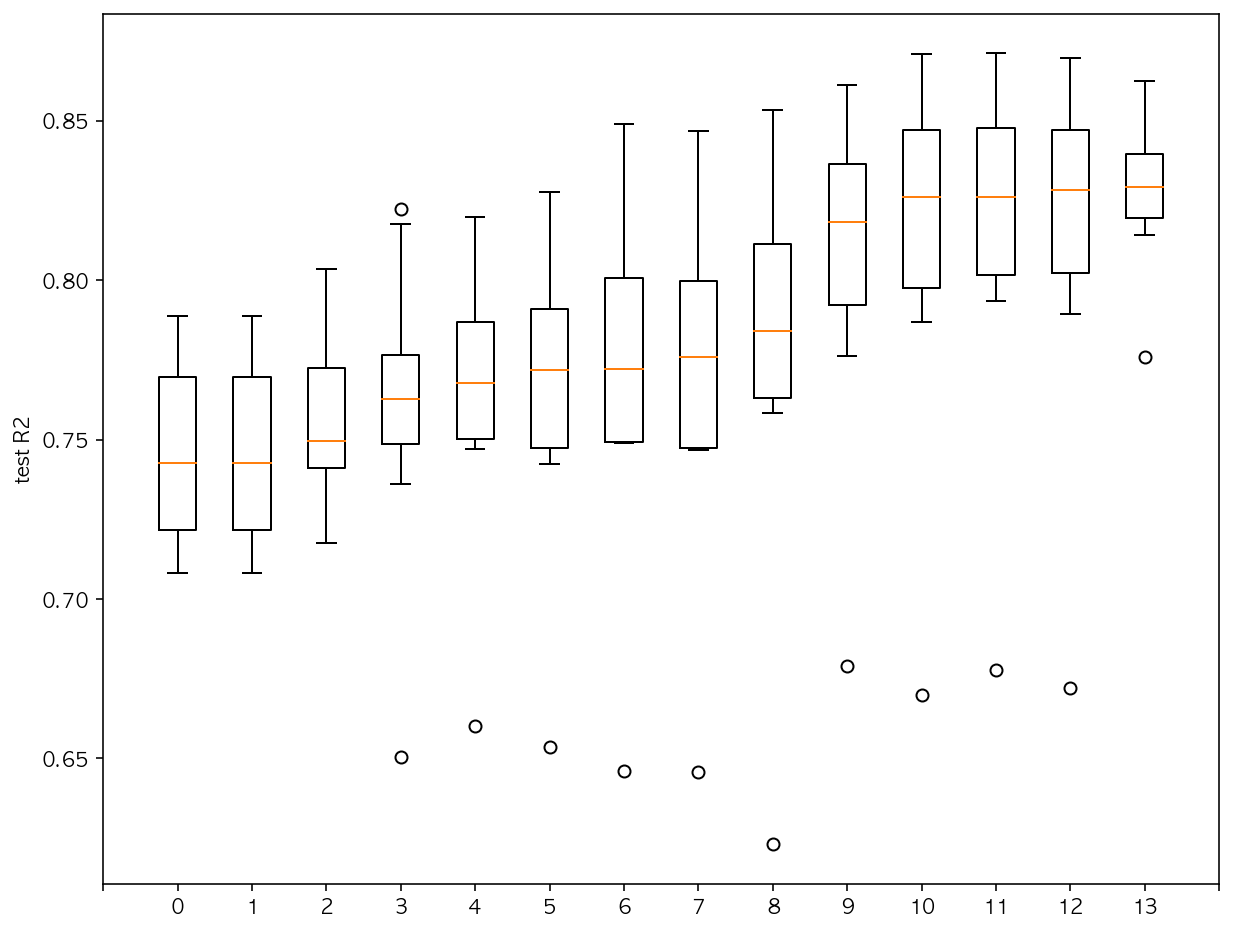

In [162]:
for i in range(0, len(kfold_dict)):
    kfold_df[str(i)] = kfold_dict[str(i)]

plt.figure(figsize=(10, 8))
plt.boxplot((kfold_df['0'], kfold_df['1'],
             kfold_df['2'], kfold_df['3'], kfold_df['4'], kfold_df['5'], kfold_df['6'], kfold_df['7'], kfold_df['8'], kfold_df['9'], kfold_df['10'], kfold_df['11'], kfold_df['12'], kfold_df['13']))
plt.ylabel("test R2")
plt.xticks(np.arange(16), ('', '0', '1', '2', '3', '4',
                           '5', '6', '7', '8', '9', '10', '11', '12', '13'))

plt.show()

# model14
- result13에서 나오는 아웃라이어 158은 뺴는게 성능에 더 안좋은 영향을 준다
- audience_rating 제거

In [163]:
df14 = df13.copy()

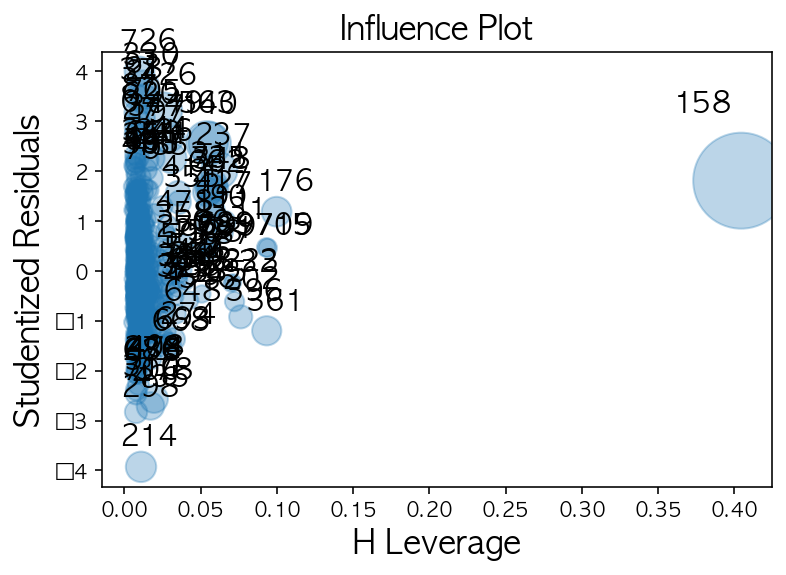

In [164]:
# Cook's distance
# 158은 제거하면 성능 저하됨

sm.graphics.influence_plot(result13, plot_alpha=0.3)
plt.show()

In [165]:
df14.iloc[158]

title                                    독전
director                                이해영
distributor             (주)넥스트엔터테인먼트월드(NEW)
release_date                       20180522
release_season                       spring
nation                                   한국
screen                                 1357
genre                                    범죄
rate                               15세이상관람가
type                                   일반영화
expert_rating                          5.29
starring_actors                 조진웅,류준열,김주혁
running_times                           123
audience_rating                     8.64006
rating_audiences                       1303
realease_year                          2018
director_power                       351208
sequel                                    0
original                                  1
actor_power                        35620681
director_movie_count                      1
actor_movie_count                        17
before_news                     

In [166]:
df14.describe()

,release_date,screen,expert_rating,running_times,audience_rating,rating_audiences,realease_year,director_power,sequel,original,actor_power,director_movie_count,actor_movie_count,before_news,after_news,holiday,aud_nationwide,log_aud,before_news_0to1,after_news_0to1
count,7.360000e+02,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02,736.000000,736.000000,7.360000e+02,736.00000,736.000000,736.000000,736.000000,736.000000,7.360000e+02,736.000000,736.000000,736.000000
mean,2.016994e+07,609.805707,5.394348,109.820652,8.186589,607.035326,2016.927989,5.335467e+05,0.447011,0.294837,9.891169e+06,0.62500,6.123641,351.161685,373.489130,0.055707,1.076400e+06,12.784095,351.171196,373.490489
std,1.433747e+04,407.874736,2.036156,19.757314,1.398319,996.830238,1.433887,1.544337e+06,0.497522,0.456280,1.441875e+07,0.92177,5.197036,619.595622,426.589733,0.229510,1.917812e+06,1.481990,619.590232,426.588543
min,2.014113e+07,28.000000,0.000000,48.000000,0.000000,0.000000,2014.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,3.186600e+04,10.369295,1.000000,1.000000
25%,2.016022e+07,318.750000,5.000000,97.000000,7.866826,88.000000,2016.000000,0.000000e+00,0.000000,0.000000,3.884325e+05,0.00000,2.000000,23.000000,81.750000,0.000000,1.003988e+05,11.516903,23.000000,81.750000
50%,2.017052e+07,517.500000,5.870000,110.000000,8.426640,237.500000,2017.000000,0.000000e+00,0.000000,0.000000,4.228314e+06,0.00000,5.000000,59.000000,227.000000,0.000000,2.895895e+05,12.576220,59.000000,227.000000
75%,2.018091e+07,828.000000,6.670000,122.000000,8.891483,682.750000,2018.000000,2.242395e+05,1.000000,1.000000,1.312543e+07,1.00000,9.000000,384.250000,533.500000,0.000000,1.124841e+06,13.933152,384.250000,533.500000
max,2.019123e+07,2648.000000,9.110000,222.000000,10.000000,9080.000000,2019.000000,1.735406e+07,1.000000,1.000000,1.278038e+08,6.00000,32.000000,5514.000000,3662.000000,1.000000,1.626336e+07,16.604425,5514.000000,3662.000000


In [167]:
# df14['release_date'] = pd.to_datetime(df14['release_date'])

In [168]:
# df14['release_date'] = df14['release_date'].dt.strftime('%Y-%m-%d')

In [169]:
# df14

In [170]:
# 6개의 독립변수 사용

feature_names = ['screen**(4/7)', 'np.log(screen)',
                 'rating_audiences**(3/7)', 'rating_audiences**2', 'np.log(after_news_0to1)']
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model14 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df14)
result14 = model14.fit()
print(result14.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     471.9
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          6.56e-282
Time:                        18:03:28   Log-Likelihood:                -662.33
No. Observations:                 736   AIC:                             1343.
Df Residuals:                     727   BIC:                             1384.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [171]:
# kfold 14

from sklearn.model_selection import KFold

kfold_dict['14'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df14)):
    df_train = df14.iloc[idx_train]
    df_test = df14.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'running_times', 'rating_audiences',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['14'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['14'])/10)

학습 R2 = 0.83691299, 검증 R2 = 0.84185872
학습 R2 = 0.83562598, 검증 R2 = 0.85749287
학습 R2 = 0.83880869, 검증 R2 = 0.83103831
학습 R2 = 0.83527166, 검증 R2 = 0.86302095
학습 R2 = 0.84029550, 검증 R2 = 0.81902536
학습 R2 = 0.84057016, 검증 R2 = 0.81424761
학습 R2 = 0.84410756, 검증 R2 = 0.77604530
학습 R2 = 0.84018221, 검증 R2 = 0.82191603
학습 R2 = 0.83675926, 검증 R2 = 0.83626305
학습 R2 = 0.83932399, 검증 R2 = 0.82794996


In [172]:
# model14의 테스트 R

pred = result14.predict(X_test[['screen', 'rating_audiences',
                                'after_news_0to1', 'dist_cat', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8303763836653224

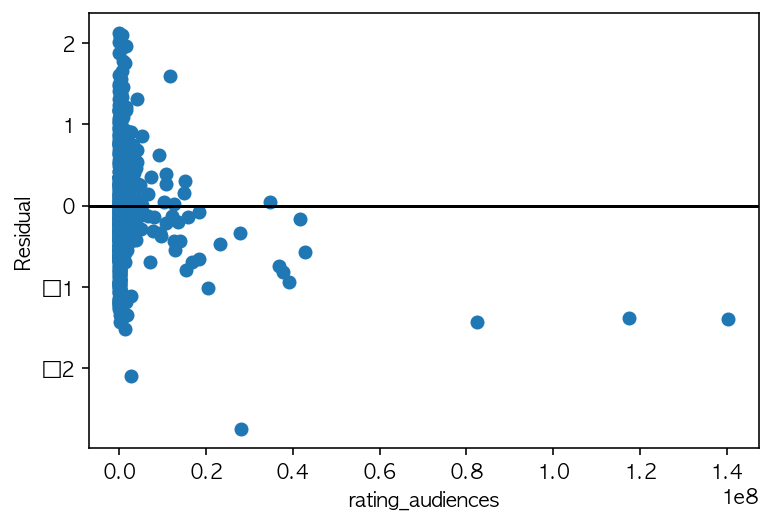

In [174]:
plt.plot((df10['rating_audiences'])**(2), result9.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

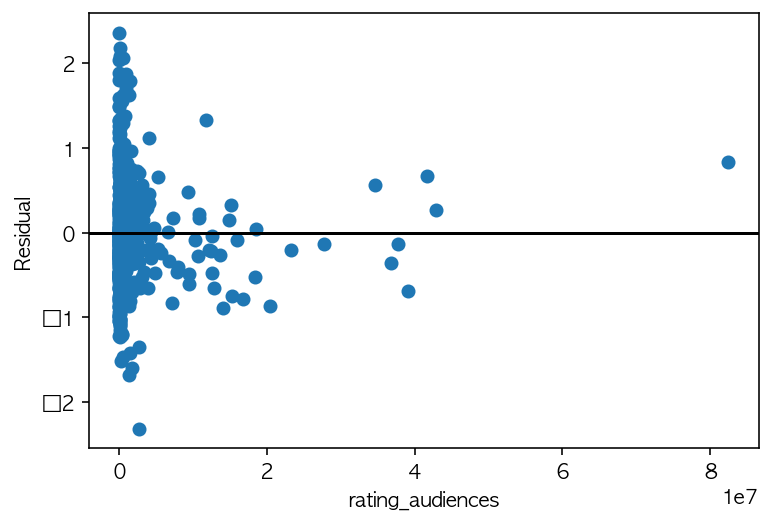

In [173]:
plt.plot((df14['rating_audiences'])**(2), result14.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("rating_audiences")
plt.ylabel("Residual")
plt.show()

# model15
- 장르 제거

In [192]:
df15 = df14.copy()

In [195]:
df15.columns

Index(['title', 'director', 'distributor', 'release_date', 'release_season',
       'nation', 'screen', 'genre', 'rate', 'type', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_movie_count', 'actor_movie_count',
       'before_news', 'after_news', 'holiday', 'dist_cat', 'aud_nationwide',
       'log_aud', 'before_news_0to1', 'after_news_0to1'],
      dtype='object')

In [210]:
# plt.figure(figsize=(14, 6))
# plt.subplot(121)
# plt.scatter(np.log(df15[df15["holiday"] == 1]['expert_rating']), df15[df15["holiday"] == 1]['log_aud'])
# plt.subplot(122)
# plt.scatter(np.log(df15[df15["holiday"] == 0]['expert_rating']), df15[df15["holiday"] == 0]['log_aud'])

# plt.show()

In [211]:
df15.columns

Index(['title', 'director', 'distributor', 'release_date', 'release_season',
       'nation', 'screen', 'genre', 'rate', 'type', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_movie_count', 'actor_movie_count',
       'before_news', 'after_news', 'holiday', 'dist_cat', 'aud_nationwide',
       'log_aud', 'before_news_0to1', 'after_news_0to1'],
      dtype='object')

In [251]:
# 5개의 독립변수 사용

feature_names = ['screen**(4/7)', 'np.log(screen)',
                 'rating_audiences**(3/7)', 'rating_audiences**2', 'np.log(after_news_0to1)', ]
feature_names = ["scale({})".format(name)
                 for name in feature_names] + ['dist_cat', 'C(sequel)']
model15 = sm.OLS.from_formula(
    "log_aud ~" + "+".join(feature_names), data=df15)
result15 = model15.fit()
print(result15.summary())

                            OLS Regression Results                            
Dep. Variable:                log_aud   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     471.9
Date:                Sat, 11 Apr 2020   Prob (F-statistic):          6.56e-282
Time:                        15:49:55   Log-Likelihood:                -662.33
No. Observations:                 736   AIC:                             1343.
Df Residuals:                     727   BIC:                             1384.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [252]:
# kfold 15

from sklearn.model_selection import KFold

kfold_dict['15'] = []
scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df15)):
    df_train = df15.iloc[idx_train]
    df_test = df15.iloc[idx_test]

    model = sm.OLS.from_formula(
        "log_aud ~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test[['screen', 'running_times', 'rating_audiences', 'director_power',
                                   'before_news_0to1', 'after_news_0to1', 'dist_cat', 'sequel']])
    rss = ((df_test['log_aud'] - pred) ** 2).sum()
    tss = ((df_test['log_aud'] - df_test['log_aud'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    kfold_dict['15'].append(rsquared)
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

kfold_dict_avr.append(sum(kfold_dict['15'])/10)

학습 R2 = 0.83691299, 검증 R2 = 0.84185872
학습 R2 = 0.83562598, 검증 R2 = 0.85749287
학습 R2 = 0.83880869, 검증 R2 = 0.83103831
학습 R2 = 0.83527166, 검증 R2 = 0.86302095
학습 R2 = 0.84029550, 검증 R2 = 0.81902536
학습 R2 = 0.84057016, 검증 R2 = 0.81424761
학습 R2 = 0.84410756, 검증 R2 = 0.77604530
학습 R2 = 0.84018221, 검증 R2 = 0.82191603
학습 R2 = 0.83675926, 검증 R2 = 0.83626305
학습 R2 = 0.83932399, 검증 R2 = 0.82794996


In [253]:
# model14의 테스트 R

pred = result15.predict(X_test[['screen', 'rating_audiences', 'director_power', 'dist_cat',
                                'after_news_0to1', 'sequel']])
rss = ((y_test['log_aud'] - pred) ** 2).sum()
tss = ((y_test['log_aud'] - y_test['log_aud'].mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.8303763836653224

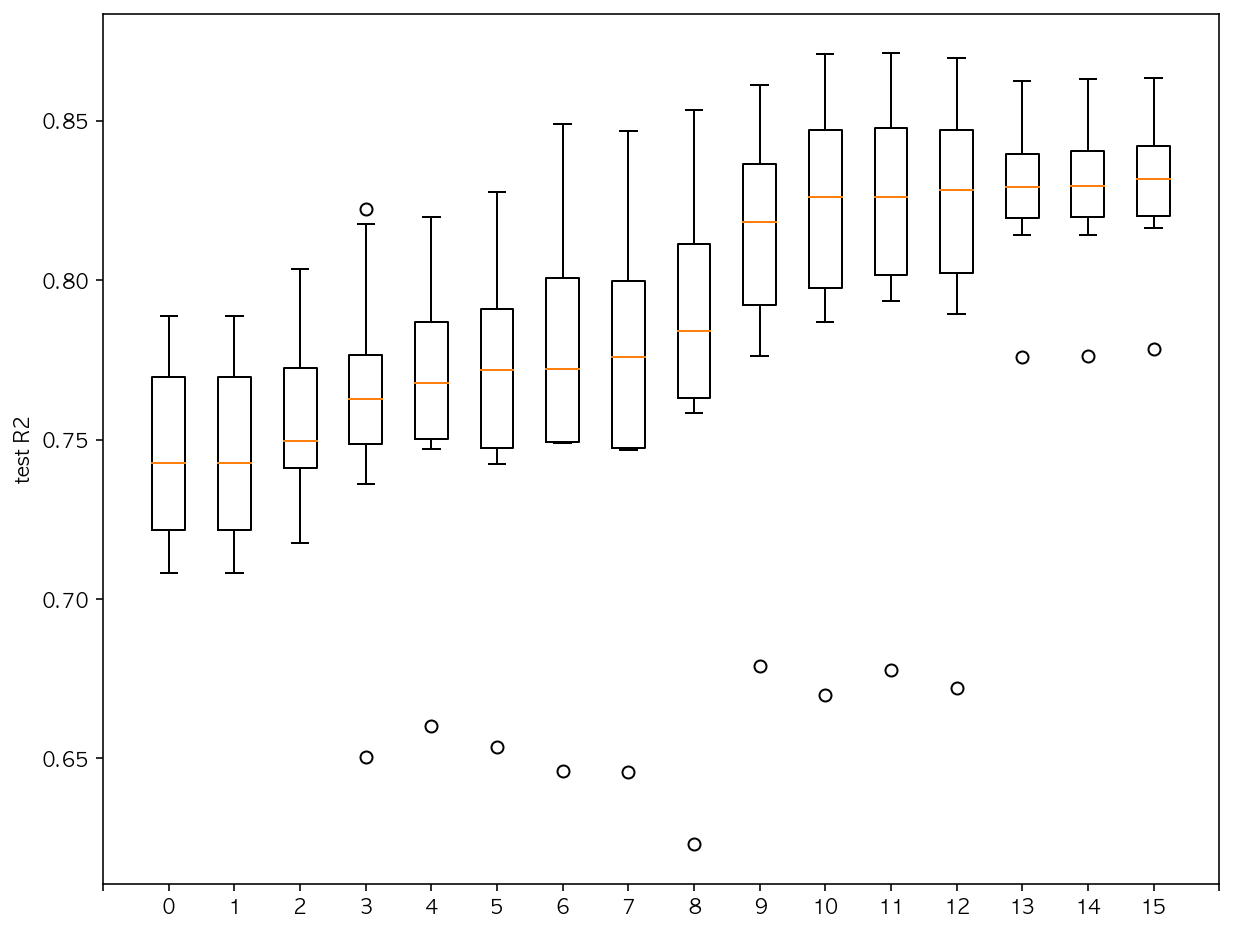

In [250]:
for i in range(0, len(kfold_dict)):
    kfold_df[str(i)] = kfold_dict[str(i)]

plt.figure(figsize=(10, 8))
plt.boxplot((kfold_df['0'], kfold_df['1'],
             kfold_df['2'], kfold_df['3'], kfold_df['4'], kfold_df['5'], kfold_df['6'], kfold_df['7'], kfold_df['8'], kfold_df['9'], kfold_df['10'], kfold_df['11'], kfold_df['12'], kfold_df['13'], kfold_df['14'], kfold_df['15']))
plt.ylabel("test R2")
plt.xticks(np.arange(18), ('', '0', '1', '2', '3', '4',
                           '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'))

plt.show()